## Introduction

This notebook contains Julia code used to generate examples and tables in the article "Numbers Without Ones (Revisited)", *Recreational Mathematics Magazine* (forthcoming 2023).

## Level Finding

An integer is ``one-free'' if none of its digits is 1. The level of a positive integer n is the smallest positive integer m such that n*m is one-free. Let's start by defining a function to calculate the level of any given n using a brute force approach that terminates when the level has been found or when all values up to some maximum value have been tested.

In [1]:
function level(n, maxleveltest)
    # inputs:
    #    n - the positive integer whose level we seek
    #    maxleveltest - the largest positive integer we will test
    # output:
    #    the level of n, if it <= maxleveltest
    #    "error", otherwise
    for i in 1:maxleveltest
        if occursin('1', string(i*n)) == false 
            return i
        end
    end
return "error"
end

level (generic function with 1 method)

In [2]:
maxleveltest = 100  # We know that every number < 200 has a 1-eliminating multiplier < 50 if it has any

level_array(n::Integer, maxleveltest) = [level(i, maxleveltest) for i in 1:n]
println(level_array(20, maxleveltest))

[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]


## Crelle Multipliers

The `Crelle multiplier` of a positive integer `k` is the smallest 1-free multiplier of `k` found by comparing repetitions of 2’s.

In [3]:
function twos_number(n)
    # input:
    #    n - a positive integer
    # output:
    #    the value of a string of n copies of the digit 2 in base ten
    if n==1
        return 2
    else
        return 2*big(10)^(n-1) + twos_number(n-1)  # 10^n does not work for n>22 so use "big"
    end
end

twos_number (generic function with 1 method)

In [4]:
function crelle_product(k::Integer)
    # input:
    #    k - a positive integer
    # output:
    #    k times the Crelle multiplier of k
    for i in 2:k+1     # i is the longer sequence
        for j in i-1:-1:1    # j is the shorter sequence. We go backwards to check smaller differences before larger    
            if mod(twos_number(i),k)== mod(twos_number(j),k)
                return (twos_number(i)-twos_number(j))
            end
        end
    end    
end  

crelle_product (generic function with 1 method)

In [5]:
crelle_multiplier(k::Integer) = div(crelle_product(k),k)
raw_c_array(n::Integer) = [crelle_multiplier(i) for i in 1:n]
println(raw_c_array(20))

BigInt[20, 10, 740, 5, 4, 370, 317460, 25, 246913580, 2, 20, 185, 170940, 158730, 148, 125, 1307189542483660, 123456790, 116959064327485380, 1]


## Crelle Bound

There is a quick method for finding an upper bound for `Crelle multipliers`. These bound are called `Crelle bounds`.

In [6]:
c = 2+2/9 # coefficient for Crelle bound
c_bound(k) = (c*(1/k)*big(10)^k-2/k)

function r_c_bound(k)
    # input:
    #    k - a positive integer
    # output:
    #    the (rounded) Crelle bound of k
    if k == 1  
        return 20.2
    elseif k == 20  
        return 20.2
    else
        return round(c_bound(k), sigdigits =3)
    end
end

r_c_bound (generic function with 1 method)

In [7]:
r_cb_array(n) =[r_c_bound(i) for i in 1:n]
println(r_cb_array(25))

AbstractFloat[20.2, 110.0, 740.0, 5560.0, 44400.0, 370000.0, 3.17e+06, 2.78e+07, 2.47e+08, 2.22e+09, 2.02e+10, 1.85e+11, 1.71e+12, 1.59e+13, 1.48e+14, 1.39e+15, 1.31e+16, 1.23e+17, 1.17e+18, 20.2, 1.06e+20, 1.01e+21, 9.66e+21, 9.26e+22, 8.89e+23]


## Inspect Results

In [8]:
using DataFrames
using PrettyTables

dict(n) = Dict("Number"=>collect(1:n), "Crelle Bound"=>r_cb_array(n), "Crelle Multiplier"=>raw_c_array(n), 
    "Least Multiplier"=>level_array(n,50))

df = DataFrame(dict(25))
select!(df,[4,3,2,1])
pretty_table(df, nosubheader=true)

open("multiplier_table.pdf", "w") do f
    pretty_table(f, df, nosubheader=true)
end


┌────────┬──────────────────┬───────────────────────┬──────────────┐
│ Number │ Least Multiplier │     Crelle Multiplier │ Crelle Bound │
├────────┼──────────────────┼───────────────────────┼──────────────┤
│      1 │                2 │                    20 │         20.2 │
│      2 │                1 │                    10 │        110.0 │
│      3 │                1 │                   740 │        740.0 │
│      4 │                1 │                     5 │       5560.0 │
│      5 │                1 │                     4 │      44400.0 │
│      6 │                1 │                   370 │     370000.0 │
│      7 │                1 │                317460 │     3.17e+06 │
│      8 │                1 │                    25 │     2.78e+07 │
│      9 │                1 │             246913580 │     2.47e+08 │
│     10 │                2 │                     2 │     2.22e+09 │
│     11 │                2 │                    20 │     2.02e+10 │
│     12 │                2 │     

In [9]:
println("The crelle multiplier of 81 is ", float(crelle_multiplier(81)))
println("The crelle bound of 81 is ", c_bound(81))

The crelle multiplier of 81 is 2.743484224965706447187928669410150891632373113854595336076817558299039780521267e+79
The crelle bound of 81 is 2.74348422496570633344337153403103002347052097320556640625e+79


## Find Exceptionally Large Levels and Crelle Multipliers

In [10]:
# Find all numbers between one and ten million with a level greater than 48.
# (There are two.)

@time begin
    maxexemplartest = 10000000
    maxleveltest =100
    
    for i in 1:maxexemplartest
        if level(i, maxleveltest) == "error"
            println("number ",i, " is of level greater than ", maxleveltest)
        elseif level(i, maxleveltest)>48
            println("number ",i, " is of level ", level(i,maxleveltest))
        end
    end
end

number 4580102 is of level 49
number 4580201 is of level 49
  4.245869 seconds (122.98 M allocations: 4.538 GiB, 13.18% gc time, 0.77% compilation time)


In [11]:
# Check that the product above is ones-free

4580102*49 

224424998

In [12]:
# Find largest level for numbers up to one hundred million.

@time begin
   findmax(level_array(100000000,200))
end

 16.950163 seconds (523.47 M allocations: 24.038 GiB, 21.07% gc time)


(98, 22900501)

In [13]:
# find the largest Crelle muliplier for numbers between 1 and 100

@time begin
   maxCrelle, exemplar =findmax(raw_c_array(100))
   println("maxCrellpultiplier =", maxCrelle)
   println("exemplar = ", exemplar)
   println("float of Crelle multiplier = ", float(maxCrelle))
   println("Crelle product = ", maxCrelle*exemplar)
end

maxCrellpultiplier =22909507445589919816723940435280641466208476517754868270332187857961053837342497136311569301260
exemplar = 97
float of Crelle multiplier = 2.290950744558991981672394043528064146620847651775486827033218785796105383734257e+94
Crelle product = 2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222220
  0.956452 seconds (18.65 M allocations: 395.935 MiB, 8.04% gc time, 3.44% compilation time)


In [14]:
# find the largest Crelle muliplier for numbers between 1 and 1000

@time begin
   maxCrelle, exemplar =findmax(raw_c_array(1000))
   println("maxCrellpultiplier =", maxCrelle)
   println("exemplar = ", exemplar)
   println("float of Crelle multiplier = ", float(maxCrelle))
   println("Crelle product = ", maxCrelle*exemplar)
end

maxCrellpultiplier =22606533288120266757092799819147733695037865943257601446818130439697072453939188425454956482423420368486492596360348140612637052108059229117214875098903583135526167062280999208771334915790663501752006329829320673674691985983949361365434610602464112128405109076523115180287102972759127387815078557703176217926980897479371538374590256584152820165027693003277947326777438679778455973776421385780490561772352209788628913756075505821182321690968689951395953430541426472250480388832372555668588221996156889341019554651294224030744885271843562789646207754040917825251497682830337967672657397988018537357296258618740816095851701141629931050073471233186390866960551599412230134508873064315587204702158923929015485475302362382728608567876116197581100938171131456991070419351192494630948344071436645190460042952413247428506838476319656380694020571945292189442748954447835424437662484458008364417316604498700124335933084661467164010399005312535322708262687916807957499717418333898496665536340

## Find the Smallest Integers of a Given Level

In [15]:
function minat(n, maxexemplartest)
    # inputs:
    #    n - a positive integer
    #    maxexemplartest - the largest positive integer we will test
    # output:
    #    the smallest number of level n if one smaller than maxexmplartest exits;
    #               otherwise returns "none less than maxexemplartest" 

    if n % 10  == 0        # Since we know numbers ending in 0 are not levels, it saves time to say this now.
        return "none"
    else
       for i in 1:maxexemplartest
           if level(i,maxexemplartest) == n
               return i
           end
       end
    end
return "none less than maxexemplartest"
end

minat (generic function with 1 method)

In [16]:
println("least exemplar of level 49 = ", minat(49,maxexemplartest))
println("least exemplar of level 59 = ", minat(59,maxexemplartest))

least exemplar of level 49 = 4580102
least exemplar of level 59 = none less than maxexemplartest


In [17]:
@time begin
   minat_array = [minat(i,10000000000) for i in 1:100]
   println(minat_array)
end

Any[2, 1, 81, 51, 531, 5421, 3157, 2571, 25517, "none", 25157, 20531, 26571, 143053, 15703, 130305, 140257, 125703, 105302, "none", 109027, 91027, 90271, 102053, 839031, 7701303, 7428017, 7142859, 701303, "none", 6516354, 6253014, 6253013, 5890103, 5780102, 5701027, 5420102, 540102, 530102, "none", 5010268, 5240103, 5130103, 4550102, 4570102, 5010269, 5026901, 43008018, 4580102, "none", 40050102, 39005301, 39008631, 38008513, 37007018, 36513007, 35131007, 35007013, 50251301, "none", 328007013, 40060201, 321006015, 32006013, 40050201, 303900501, 30200501, 30050102, 30050201, "none", 290050102, 277890051, 274006012, 270900501, 30134006, 26800501, 260050102, 30060134, 257700501, "none", 250050102, 244005301, 241005401, 239005301, 24005401, 232900501, 231004009, 227900501, 229100501, "none", 2200400915, 240060301, 220045801, 2130040501, 2110040084, 229900501, 210045801, 22900501, 210043008, "none"]
2388.663401 seconds (79.58 G allocations: 3.468 TiB, 19.12% gc time, 0.01% compilation time)

In [18]:
df = DataFrame(Level = 1:100, Least_Exemplar = minat_array)

Row,Level,Least_Exemplar
,Int64,Any
1,1,2
2,2,1
3,3,81
4,4,51
5,5,531
6,6,5421
7,7,3157
8,8,2571
9,9,25517


In [19]:
df1=@view(df[1:25, :])
df2=@view(df[26:50, :])
df3=@view(df[51:75, :])
df4=@view(df[76:100, :])

pretty_table(df1, nosubheader=true)
pretty_table(df2, nosubheader=true)
pretty_table(df3, nosubheader=true)
pretty_table(df4, nosubheader=true)

┌───────┬────────────────┐
│ Level │ Least_Exemplar │
├───────┼────────────────┤
│     1 │              2 │
│     2 │              1 │
│     3 │             81 │
│     4 │             51 │
│     5 │            531 │
│     6 │           5421 │
│     7 │           3157 │
│     8 │           2571 │
│     9 │          25517 │
│    10 │           none │
│    11 │          25157 │
│    12 │          20531 │
│    13 │          26571 │
│    14 │         143053 │
│    15 │          15703 │
│    16 │         130305 │
│    17 │         140257 │
│    18 │         125703 │
│    19 │         105302 │
│    20 │           none │
│    21 │         109027 │
│    22 │          91027 │
│    23 │          90271 │
│    24 │         102053 │
│    25 │         839031 │
└───────┴────────────────┘
┌───────┬────────────────┐
│ Level │ Least_Exemplar │
├───────┼────────────────┤
│    26 │        7701303 │
│    27 │        7428017 │
│    28 │        7142859 │
│    29 │         701303 │
│    30 │           none │
│

## Plot Least Exemplar as Function of Level

In [40]:
farray = replace(minat_array, "none" => 0) # convert minat_array to floats suitable for graphing
y = convert(Array{Float64,1}, farray)
y = log10.(y)
y = replace(y, -Inf => missing)

x = 1:100

1:100

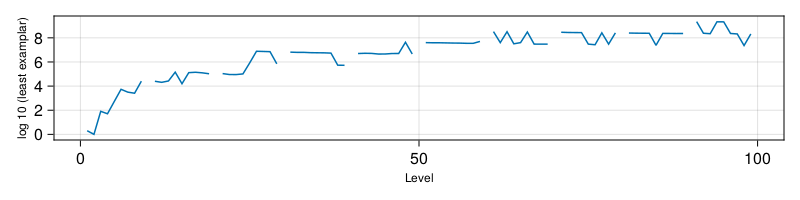

In [41]:
using CairoMakie
figure = CairoMakie.Figure(resolution = (800, 200))
ax1 = figure[1, 1] = Axis(figure, xlabel = "Level", ylabel = "log 10 (least examplar)", xlabelsize = 12, ylabelsize=12, title=" ")
l1 = lines!(ax1, x, y)
display(figure)